In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=143c62f45f74da57d73baa6d79b6c9f53b1cc2b7268cfa1feb1625aae8cf5de7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


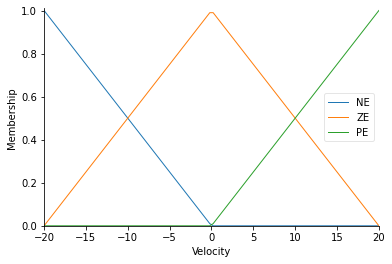

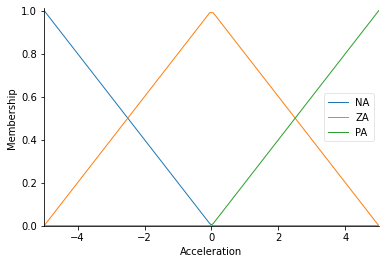

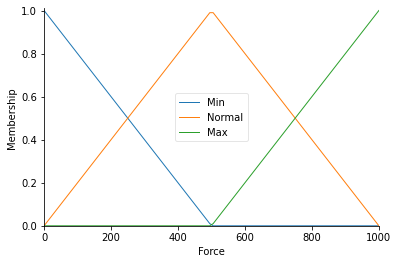

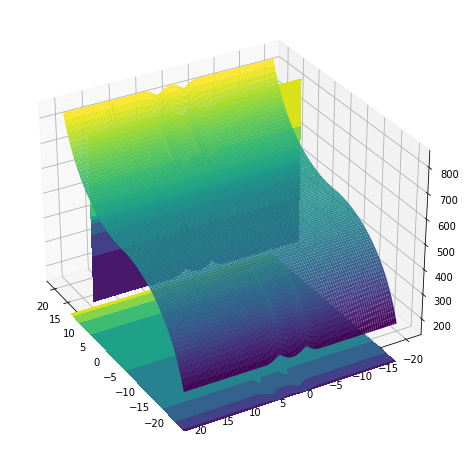

In [5]:
from networkx.algorithms.bipartite import projection
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe_velocity = np.linspace(-20,20,100)
universe_acceleration = np.linspace(-5,5,100)
universe_force = np.linspace(0,1000,100)

velocity = ctrl.Antecedent(universe_velocity,'Velocity')
acceleration = ctrl.Antecedent(universe_acceleration,'Acceleration')
force = ctrl.Consequent(universe_force,'Force')

name_velocity = ['NE','ZE','PE']
name_acceleration = ['NA','ZA','PA']
name_force = ['Min','Normal','Max']
velocity.automf(names=name_velocity)
acceleration.automf(names=name_acceleration)
force.automf(names=name_force)

velocity.view()
acceleration.view()
force.view()

rule1 = ctrl.Rule(antecedent=velocity['NE']&(acceleration['NA']|acceleration['ZA']|acceleration['PA']),consequent=force['Min'])
rule2 = ctrl.Rule(antecedent=velocity['ZE']&(acceleration['NA']|acceleration['ZA']|acceleration['PA']),consequent=force['Normal'])
rule3 = ctrl.Rule(antecedent=velocity['PE']&(acceleration['NA']|acceleration['ZA']|acceleration['PA']),consequent=force['Max'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
sim = ctrl.ControlSystemSimulation(computing_ctrl,flush_after_run=100*100+1)
upsampled = np.linspace(-20,20,100)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['Velocity'] = x[i,j]
    sim.input['Acceleration'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Force']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride = 1,cmap = 'viridis',linewidth = 0.4,antialiased = True)
cset = ax.contourf(x,y,z,zdir='z',offset = 9,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='x',offset = 11,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='y',offset = 11,cmap = 'viridis')
ax.view_init(30,150)